In [1]:
import matplotlib.pyplot as plt
import thejoker.units as xu
import astropy.units as u
import statistics as stat
import seaborn as sns
import thejoker as tj
import pandas as pd
import numpy as np
import arviz as az
import pymc as pm
import corner
import math 
import h5py
import os


from astropy.visualization.units import quantity_support
from sklearn.metrics import mean_squared_error
from thejoker import JokerPrior, TheJoker, RVData
from thejoker.plot import plot_rv_curves
from scipy.stats import gaussian_kde
from os.path import join
from tqdm import tqdm

In [2]:
# Configurar el estilo de fuente global a 'serif'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Palatino', 'Charter', 'serif']

In [3]:
# Lee el archivo de texto y crea un DataFrame

# Luego intenta leer el archivo
df = pd.read_csv('allvisits.csv')
df_ordenado = df.sort_values(by='MJD').reset_index(drop=True)
df_ordenado_0 = df.sort_values(by='MJD').reset_index(drop=True)
df_ordenado = df_ordenado[df_ordenado['STARFLAG']==0].reset_index(drop=True)
df_ordenado

,VISIT_ID,APRED_VERSION,APOGEE_ID,TARGET_ID,FILE,FIBERID,PLATE,MJD,TELESCOPE,SURVEY,...,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC
0,apogee.apo25m.s.r12.8271.57037.57,r12,2M15082716+6710075,apo25m.5118.URMINOR.2M15082716+6710075,apVisit-r12-8271-57037-057.fits,57,8271,57037,apo25m,apogee2-manga,...,-9999.99,0.01004,SFD,0.038556,0.033244,-1,1,0.0,0.0,none
1,apogee.apo25m.s.r12.8112.57055.231,r12,2M15082716+6710075,apo25m.5118.URMINOR.2M15082716+6710075,apVisit-r12-8112-57055-231.fits,231,8112,57055,apo25m,apogee2-manga,...,-9999.99,0.01004,SFD,0.038556,0.033244,-1,1,0.0,0.0,none
2,apogee.apo25m.s.r12.8112.57056.231,r12,2M15082716+6710075,apo25m.5118.URMINOR.2M15082716+6710075,apVisit-r12-8112-57056-231.fits,231,8112,57056,apo25m,apogee2-manga,...,-9999.99,0.01004,SFD,0.038556,0.033244,-1,1,0.0,0.0,none
3,apogee.apo25m.s.r12.8351.57063.57,r12,2M15082716+6710075,apo25m.5118.URMINOR.2M15082716+6710075,apVisit-r12-8351-57063-057.fits,57,8351,57063,apo25m,apogee2,...,-9999.99,0.01004,SFD,0.038556,0.033244,-1,1,0.0,0.0,none
4,apogee.apo25m.s.r12.8112.57064.232,r12,2M15082716+6710075,apo25m.5118.URMINOR.2M15082716+6710075,apVisit-r12-8112-57064-232.fits,232,8112,57064,apo25m,apogee2-manga,...,-9999.99,0.01004,SFD,0.038556,0.033244,-1,1,0.0,0.0,none
5,apogee.apo25m.s.r12.8351.57066.57,r12,2M15082716+6710075,apo25m.5118.URMINOR.2M15082716+6710075,apVisit-r12-8351-57066-057.fits,57,8351,57066,apo25m,apogee2,...,-9999.99,0.01004,SFD,0.038556,0.033244,-1,1,0.0,0.0,none
6,apogee.apo25m.s.r12.8271.57081.57,r12,2M15082716+6710075,apo25m.5118.URMINOR.2M15082716+6710075,apVisit-r12-8271-57081-057.fits,57,8271,57081,apo25m,apogee2-manga,...,-9999.99,0.01004,SFD,0.038556,0.033244,-1,1,0.0,0.0,none
7,apogee.apo25m.s.r12.8271.57082.57,r12,2M15082716+6710075,apo25m.5118.URMINOR.2M15082716+6710075,apVisit-r12-8271-57082-057.fits,57,8271,57082,apo25m,apogee2-manga,...,-9999.99,0.01004,SFD,0.038556,0.033244,-1,1,0.0,0.0,none
8,apogee.apo25m.s.r12.8112.57092.231,r12,2M15082716+6710075,apo25m.5118.URMINOR.2M15082716+6710075,apVisit-r12-8112-57092-231.fits,231,8112,57092,apo25m,apogee2-manga,...,-9999.99,0.01004,SFD,0.038556,0.033244,-1,1,0.0,0.0,none
9,apogee.apo25m.s.r12.8351.57093.51,r12,2M15082716+6710075,apo25m.5118.URMINOR.2M15082716+6710075,apVisit-r12-8351-57093-051.fits,51,8351,57093,apo25m,apogee2,...,-9999.99,0.01004,SFD,0.038556,0.033244,-1,1,0.0,0.0,none


In [4]:
onlydata = pd.DataFrame()
onlydata["MJD"] = df_ordenado["MJD"]
onlydata["RV"] = df_ordenado["VHELIO"]
onlydata["err_RV"] = df_ordenado["VRELERR"]
onlydata["STARFLAG"] = df_ordenado["STARFLAG"]
onlydata

,MJD,RV,err_RV,STARFLAG
0,57037,-231.59373,0.260204,0
1,57055,-232.26694,0.154442,0
2,57056,-232.73850,0.144803,0
3,57063,-232.87675,0.135553,0
4,57064,-232.73972,0.158290,0
5,57066,-232.69759,0.153608,0
6,57081,-231.96936,0.282561,0
7,57082,-232.96712,0.149793,0
8,57092,-233.28989,0.118250,0
9,57093,-233.98509,0.142362,0


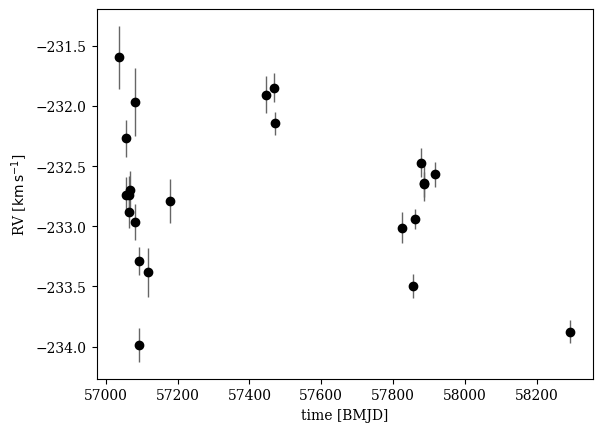

In [5]:
t = df_ordenado["MJD"]
rv = np.array(df_ordenado["VHELIO"]) * u.km/u.s
err = np.array(df_ordenado["VRELERR"]) * u.km/u.s
data = tj.RVData(t=t, rv=rv, rv_err=err)
ax = data.plot()

In [6]:
# data = RVData(t=t, rv=rv, rv_err=err)
# prior = JokerPrior.default(P_min=200*u.day, P_max=300*u.day,sigma_K0=30 * u.km / u.s,sigma_v=100 * u.km / u.s)
# joker = TheJoker(prior)
# print("Listo")

In [7]:
# with pm.Model() as model:
#     P = xu.with_unit(pm.Normal("P", 148.4, 2), u.day)
#     K = xu.with_unit(pm.Normal("K", 0.0, 2), u.km / u.s)
#     prior = tj.JokerPrior.default(sigma_v=100 * u.km / u.s, pars={"P": P, "K":K})
# joker = TheJoker(prior)

In [8]:
# rng = np.random.default_rng(seed=42) # pequeño retraso en el tiempo 
# prior_samples = prior.sample(size=1_500_000, rng=rng)
# print("Listo")

In [9]:
# prior_samples.write("prior_datosDanilo.hdf5", overwrite=True)

In [10]:
# samples = joker.rejection_sample(data,prior_samples, max_posterior_samples=1000)
# samples = samples.wrap_K()
#samples.write("samples_datosDanilo.hdf5", overwrite=True)

In [11]:
samples = tj.JokerSamples.read("TJ_samples_Danilostar.hdf5")
samples

<JokerSamples [P, e, omega, M0, s, K, v0] (1189 samples)>

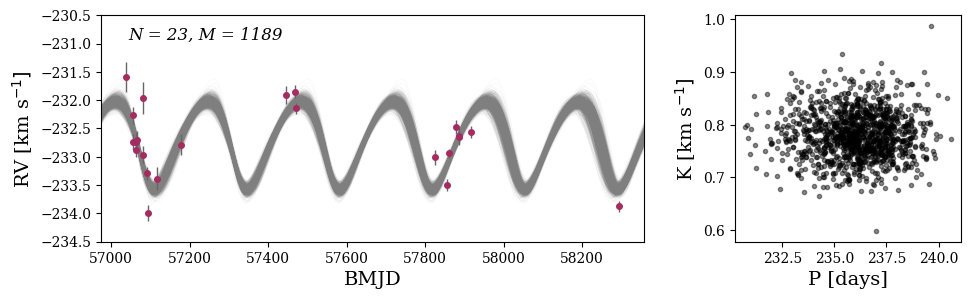

In [15]:
fig = plt.figure(figsize=(20,10))

gs = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.48, wspace=0.4)
f_ax1 = fig.add_subplot(gs[-1, :-1])
f_ax2 = fig.add_subplot(gs[-1,-1])

_ = tj.plot_rv_curves(samples,data=data,plot_kwargs=dict(color="tab:grey", alpha = 0.05),data_plot_kwargs=dict(color="#A52C60"),relative_to_t_ref=False,ax=f_ax1)
f_ax2.scatter(samples['P'].value, samples['K'].value,marker='.', color='k', alpha=0.45)

f_ax1.set_xlabel("BMJD",fontsize=14)
f_ax1.set_ylabel("RV [km s$^{-1}]$", fontsize=14)

f_ax2.set_xlabel("P [days]",fontsize=14)
f_ax2.set_ylabel("K [km s$^{-1}]$ ",fontsize=14)

f_ax1.set_ylim(-234.5,-230.5)
f_ax1.text(0.05, 0.95, f'N = {len(t)}, M = {len(samples)}', transform=f_ax1.transAxes, fontsize = 12, verticalalignment='top', horizontalalignment='left', fontstyle = 'italic')
plt.show()

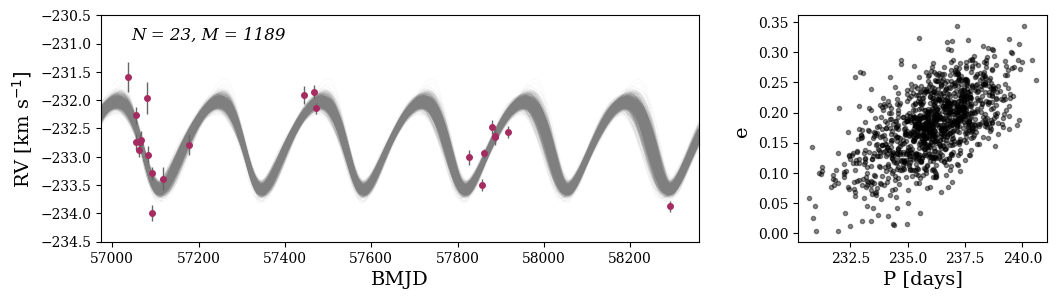

In [16]:
fig = plt.figure(figsize=(22,10))

gs = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.48, wspace=0.4)
f_ax1 = fig.add_subplot(gs[-1, :-1])
f_ax2 = fig.add_subplot(gs[-1,-1])

_ = tj.plot_rv_curves(samples,data=data,plot_kwargs=dict(color="tab:grey"),data_plot_kwargs=dict(color="#A52C60"),relative_to_t_ref=False,ax=f_ax1)
f_ax2.scatter(samples['P'].value, samples['e'].value,marker='.', color='k', alpha=0.45)

f_ax1.set_xlabel("BMJD",fontsize=14)
f_ax1.set_ylabel("RV [km s$^{-1}]$", fontsize=14)

f_ax2.set_xlabel("P [days]",fontsize=14)
f_ax2.set_ylabel("e ",fontsize=14)

f_ax1.set_ylim(-234.5,-230.5)
f_ax1.text(0.05, 0.95, f'N = {len(t)}, M = {len(samples)}', transform=f_ax1.transAxes, fontsize = 12, verticalalignment='top', horizontalalignment='left', fontstyle = 'italic')
plt.show()


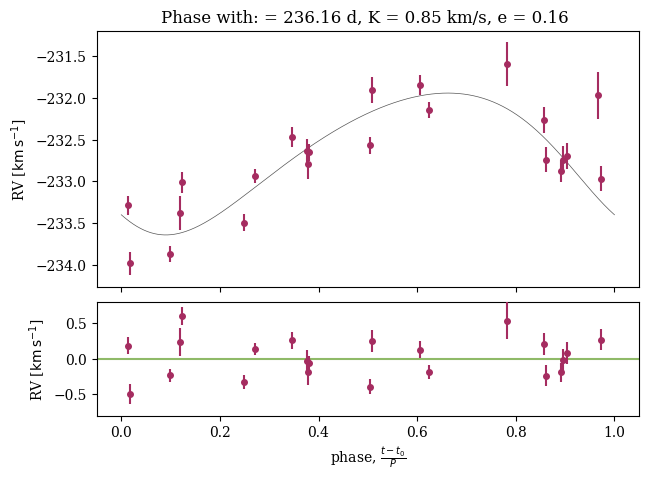

In [20]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 5), gridspec_kw={"height_ratios": (1.8, 0.8), 'hspace': 0.08})

ax[0].set_title(f"Phase with: = {round(float(samples.median_period()['P'].value),2)} d, K = {round(float(samples.median_period()['K'].value),2)} km/s, e = {round(float(samples.median_period()['e'].value),2)} ")

    
_ = tj.plot_phase_fold(samples.median_period(),data=data,ax=ax[0],remove_trend = False,data_plot_kwargs=dict(color="#A52C60"))
_ = tj.plot_phase_fold(samples.median_period(), data, ax=ax[1], residual=True,data_plot_kwargs=dict(color="#A52C60"))

ax[1].axhline(0, zorder=-10, color="#73a942", alpha=0.8)
ax[1].set_ylim(-0.8, 0.8)

for ax in fig.get_axes():
    ax.label_outer()
    #ax.grid(linestyle='-', linewidth=0.1)

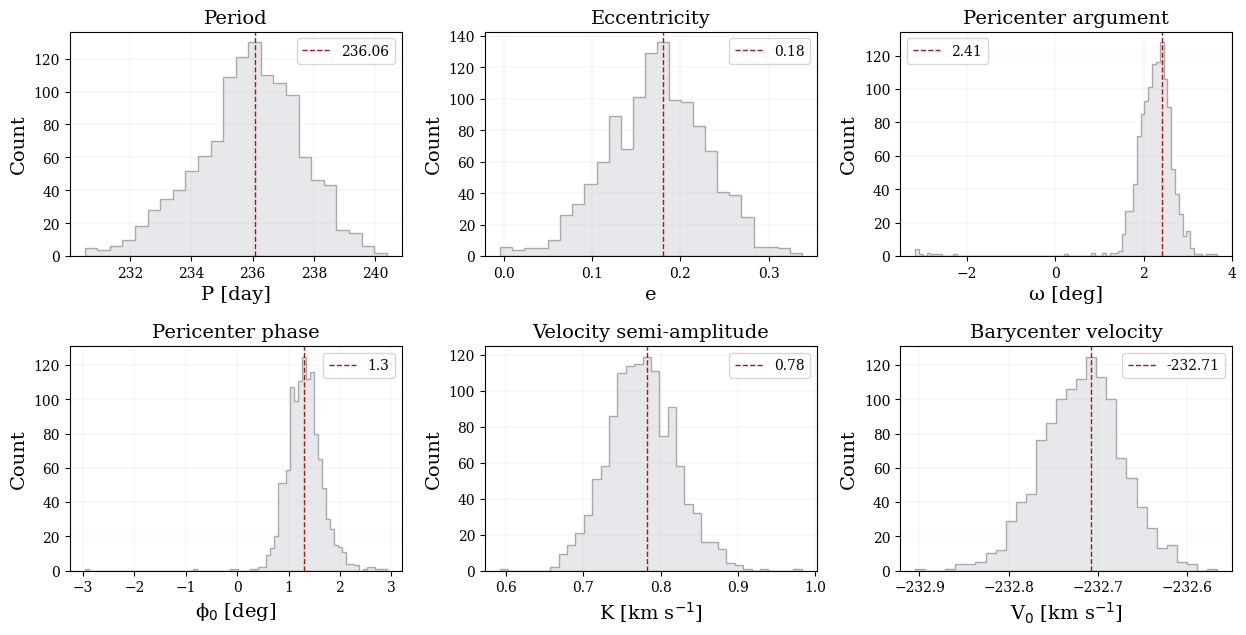

In [78]:
variables = ["P", "e", "omega", "M0", "K", "v0"]
xlabel = ["P [day]", "e", "ω [deg]", "ϕ$_0$ [deg]", "K [km s$^{-1}$]","V$_0$ [km s$^{-1}$]"]
title = ["Period","Eccentricity", "Pericenter argument", "Pericenter phase", "Velocity semi-amplitude", "Barycenter velocity"]
picos = []

fig = plt.figure(figsize=(15,7))

gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.25)
(ax1,ax2,ax3), (ax4,ax5,ax6) = gs.subplots(sharey = False, sharex = False)

for ax,i in zip(fig.get_axes(),np.arange(len(variables))):
    ax.set_ylabel("Count", fontsize = 14)
    ax.set_xlabel(xlabel[i], fontsize = 14)
    ax.set_title(title[i], fontsize = 14)
    conteos, bins, _  =  ax.hist(samples[variables[i]], bins = "auto", histtype='stepfilled', density = False ,alpha=0.3, align = 'left', color = '#adb5bd', ec="k")
    indice_maximo = np.argmax(conteos)
    
    # Obtener el valor del pico más alto
    pico_mas_alto = bins[indice_maximo]
    picos.append(pico_mas_alto)
    # Agregar una línea vertical en el pico más alto
    ax.axvline(x=pico_mas_alto, color='#a4161a', linestyle='--', linewidth = 1, label = f"{round(pico_mas_alto,2)}")
    ax.grid(linestyle='-', linewidth=0.1)
    ax.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

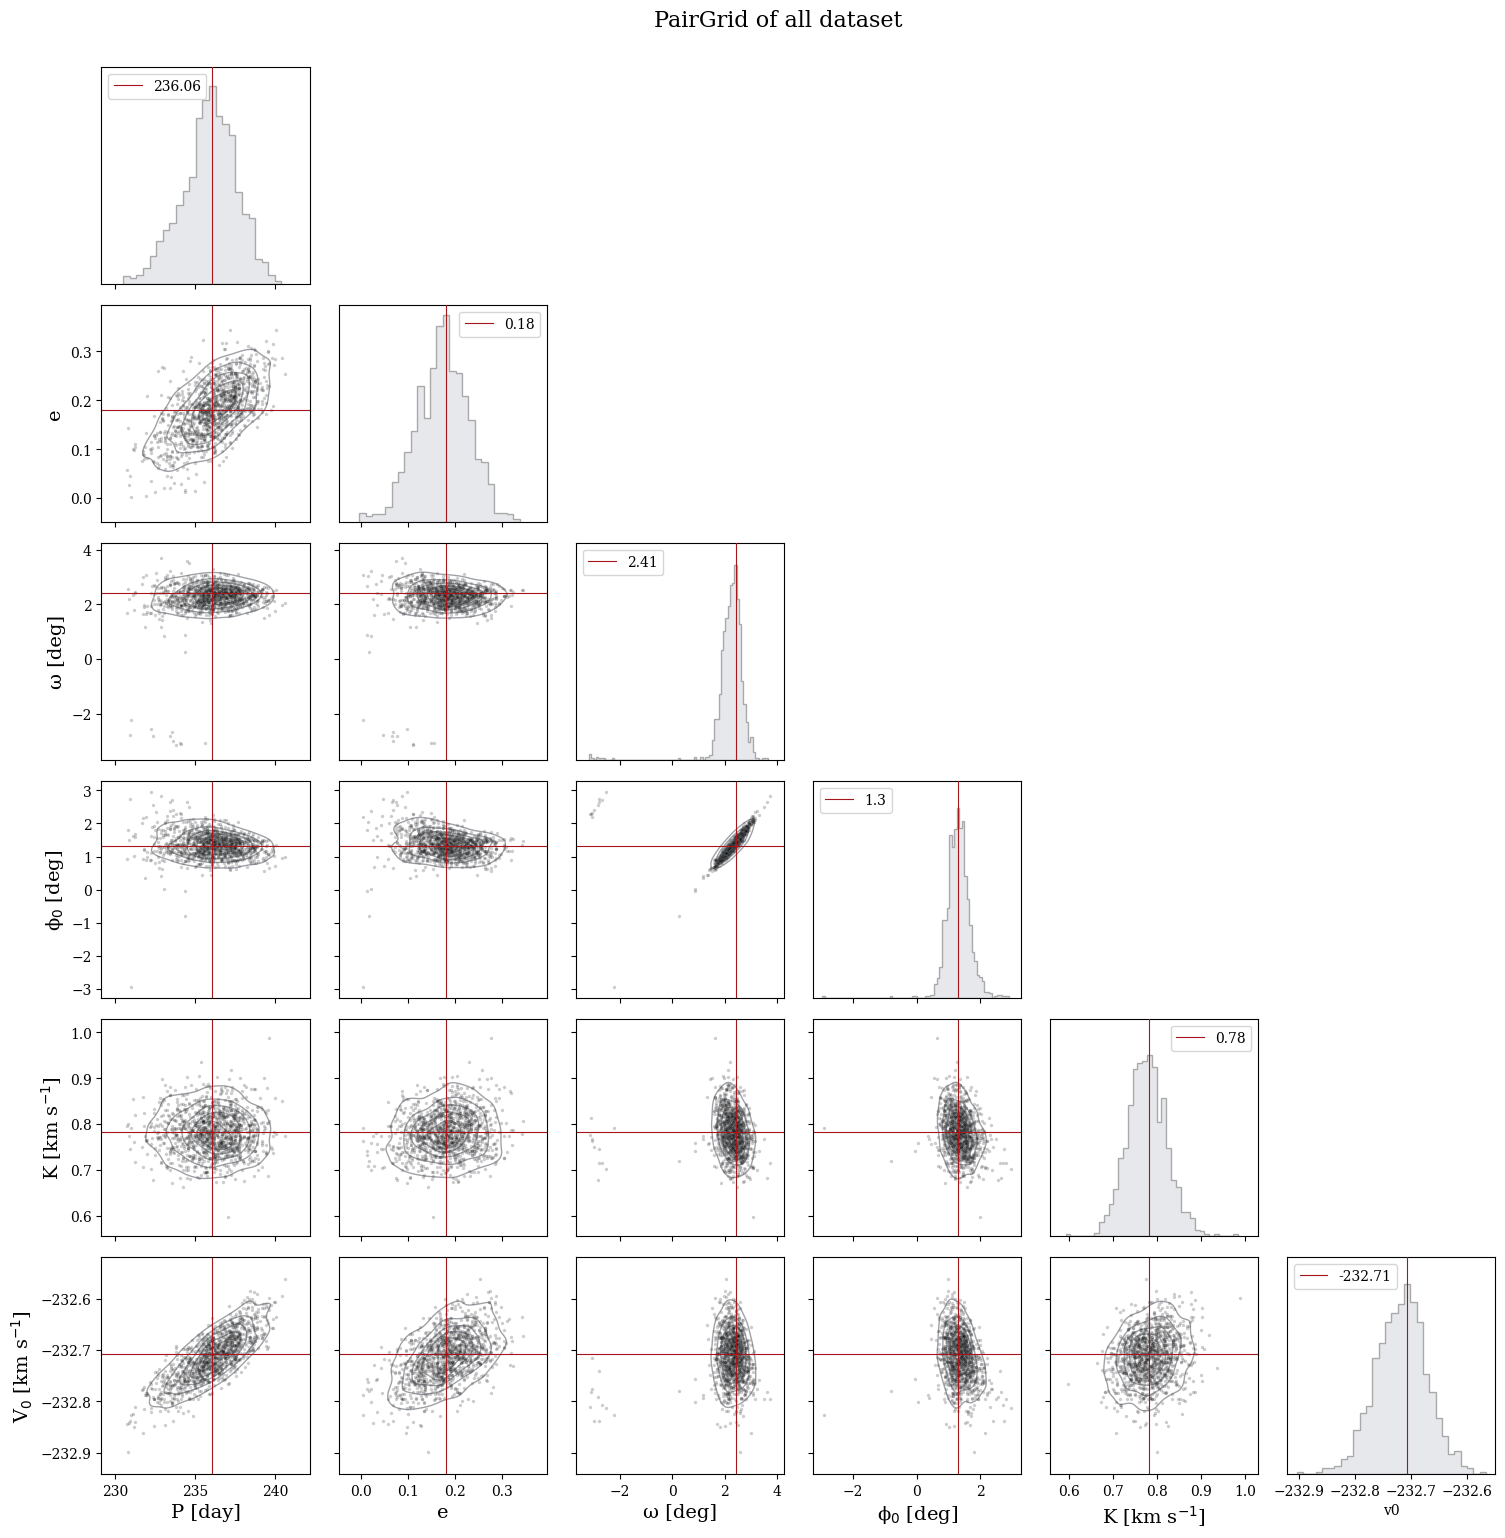

In [79]:
# Crear un gráfico de correlación utilizando pairplot
df = samples.tbl.to_pandas()
g = sns.PairGrid(df, 
            x_vars=["P", "e", "omega", "M0", "K", "v0"],
            y_vars=["P", "e", "omega", "M0", "K", "v0"],
            corner=True)                                   # No muestra las de encima de la diagonal
# Mostrar el gráfico

g.map_diag(plt.hist,  bins = "auto", histtype='stepfilled', density = False ,alpha=0.3, align = 'left', color = '#adb5bd', ec="k")             #Histogramas en la diagonal
g.map_lower(sns.kdeplot,linewidths = 1, levels=6,  color="#3F4750",thresh=.1, alpha = 0.5)             # Muestra los contornos
g.map_lower(sns.scatterplot,s = 6, alpha = 0.2, color="k")                     # Muestra los puntos

# Añadir bordes y rejillas a cada cuadrícula
for ax in g.axes.flatten():
    if ax is not None:
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.grid(False)

# Agregar líneas verticales y horizontales en los gráficos de densidad fuera de la diagonal
for i, x_var in enumerate(variables):
    for j, y_var in enumerate(variables):
        if i != j:
            ax = g.axes[j, i]
            if ax is not None:
                ax.axvline(x=picos[i], color='#a4161a', linestyle='-', linewidth=0.8)
                ax.axhline(y=picos[j], color='#a4161a', linestyle='-', linewidth=0.8)
                ax.set_xlabel(xlabel[i], fontsize = 14)
                ax.set_ylabel(xlabel[j], fontsize = 14)

# Agregar líneas verticales personalizadas en las diagonales

for i in np.arange(len(g.diag_axes)):
    ax = g.diag_axes[i]
    ax.axvline(x=picos[i], color='#a4161a', linestyle='-', linewidth = 0.8, label = f"{round(picos[i],2)}")
    ax.legend()
    
ax.set_ylabel(xlabel[-1], fontsize = 14)

# Título del PairGrid
g.fig.suptitle("PairGrid of all dataset", y=1.02, fontsize = 16)
plt.show

In [80]:
picos

[236.06342011567733,
 0.1804031877154005,
 2.4051854809702538,
 1.3045883274990961,
 0.782099341700913,
 -232.70759336592013]

In [81]:
len(bins)

31

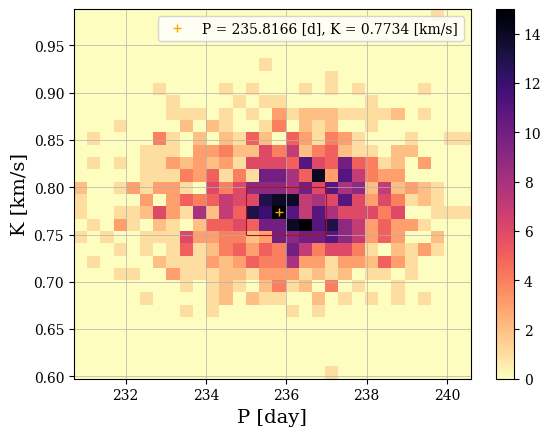

Coordenadas del valor más significativo:
x = 235.81656282820802
y = 0.7734125065382793


In [89]:
bin = 30

# Calcula el histograma bidimensional
hist, x_edges, y_edges = np.histogram2d(x=samples['P'].value, y=samples['K'].to(u.km/u.s).value, bins=bin)

# Encuentra las coordenadas del bin con el valor máximo en el histograma
max_index = np.unravel_index(np.argmax(hist), hist.shape)
x_max_density = (x_edges[max_index[0]] + x_edges[max_index[0] + 1]) / 2
y_max_density = (y_edges[max_index[1]] + y_edges[max_index[1] + 1]) / 2

# Grafica el histograma
fig, ax = plt.subplots()
h = ax.hist2d(x=samples['P'].value, y=samples['K'].to(u.km/u.s).value, bins=bin, cmap = "magma_r")
fig.colorbar(h[3], ax=ax)
ax.plot(x_max_density, y_max_density, "+", color="orange", label=f"P = {round(x_max_density, 4)} [d], K = {round(y_max_density, 4)} [km/s]")
ax.set_xlabel("P [day]", fontsize = 14)
ax.set_ylabel("K [km/s]", fontsize = 14)

xmin = 235
xmax = 237
ymin = 0.75
ymax = 0.80

ax.vlines(x=xmin, ymin = ymin, ymax = ymax, color='#a4161a', linestyle='-', linewidth=0.8)
ax.vlines(x=xmax, ymin = ymin, ymax = ymax, color='#a4161a', linestyle='-', linewidth=0.8)

ax.hlines(y=ymin ,xmin = xmin, xmax = xmax, color='#a4161a', linestyle='-', linewidth=0.8)
ax.hlines(y=ymax, xmin = xmin, xmax = xmax, color='#a4161a', linestyle='-', linewidth=0.8)

plt.grid(linestyle='-', linewidth=0.5)
plt.legend()
plt.show()

print("Coordenadas del valor más significativo:")
print("x =", x_max_density)
print("y =", y_max_density)

In [90]:
mask_P = (samples["P"].value>=xmin) & (samples["P"].value<=xmax)

Filtrado = samples[mask_P]
mask_K = (Filtrado["K"].value>=ymin) & (Filtrado["K"].value<=ymax)

Filtrado = Filtrado[mask_K]
Filtrado

<JokerSamples [P, e, omega, M0, s, K, v0] (237 samples)>

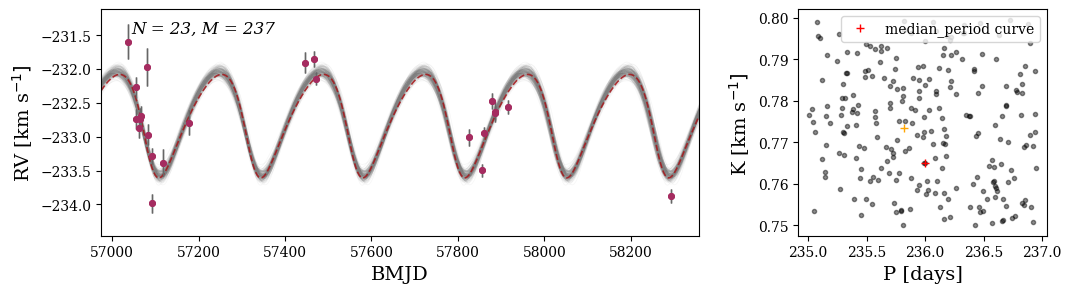

In [91]:
fig = plt.figure(figsize=(22,10))

gs = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.48, wspace=0.4)
f_ax1 = fig.add_subplot(gs[-1, :-1])
f_ax2 = fig.add_subplot(gs[-1,-1])

_ = tj.plot_rv_curves(Filtrado,data=data,plot_kwargs=dict(color="tab:grey"),data_plot_kwargs=dict(color="#A52C60"),relative_to_t_ref=False,ax=f_ax1)
_ = tj.plot_rv_curves(Filtrado.median_period(),data=data,plot_kwargs=dict(linestyle = "--", linewidth = 1.2,color="#a4161a"),data_plot_kwargs=dict(color="#A52C60"),relative_to_t_ref=False,ax=f_ax1, add_labels=True)
f_ax2.scatter(Filtrado['P'].value, Filtrado['K'].value,marker='.', color='k', alpha=0.45)

f_ax2.plot(x_max_density,y_max_density, "+", color = "orange")
f_ax2.plot(Filtrado.median_period()["P"],Filtrado.median_period()["K"], "+", color = "red", label = 'median_period curve' )

f_ax1.set_xlabel("BMJD",fontsize=14)
f_ax1.set_ylabel("RV [km s$^{-1}]$", fontsize=14)

f_ax2.set_xlabel("P [days]",fontsize=14)
f_ax2.set_ylabel("K [km s$^{-1}]$ ",fontsize=14)

f_ax1.text(0.05, 0.95, f'N = {len(t)}, M = {len(Filtrado)}', transform=f_ax1.transAxes, fontsize = 12, verticalalignment='top', horizontalalignment='left', fontstyle = 'italic')
f_ax2.legend(fontsize = 10)
plt.show()

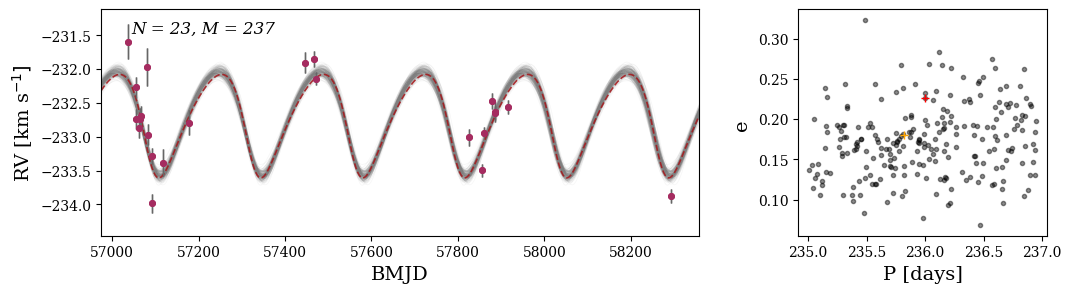

In [92]:
fig = plt.figure(figsize=(22,10))

gs = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.48, wspace=0.4)
f_ax1 = fig.add_subplot(gs[-1, :-1])
f_ax2 = fig.add_subplot(gs[-1,-1])

_ = tj.plot_rv_curves(Filtrado,data=data,plot_kwargs=dict(color="tab:grey"),data_plot_kwargs=dict(color="#A52C60"),relative_to_t_ref=False,ax=f_ax1)
_ = tj.plot_rv_curves(Filtrado.median_period(),data=data,plot_kwargs=dict(linestyle = "--", linewidth = 1.2,color="#a4161a"),data_plot_kwargs=dict(color="#A52C60"),relative_to_t_ref=False,ax=f_ax1, add_labels=True)
f_ax2.scatter(Filtrado['P'].value, Filtrado['e'].value,marker='.', color='k', alpha=0.45)

f_ax2.plot(x_max_density,picos[1], "+", color = "orange")
f_ax2.plot(Filtrado.median_period()["P"],Filtrado.median_period()["e"], "+", color = "red" ,label = 'median_period curve'  )

f_ax1.set_xlabel("BMJD",fontsize=14)
f_ax1.set_ylabel("RV [km s$^{-1}]$", fontsize=14)

f_ax2.set_xlabel("P [days]",fontsize=14)
f_ax2.set_ylabel("e ",fontsize=14)

f_ax1.text(0.05, 0.95, f'N = {len(t)}, M = {len(Filtrado)}', transform=f_ax1.transAxes, fontsize = 12, verticalalignment='top', horizontalalignment='left', fontstyle = 'italic')
plt.show()

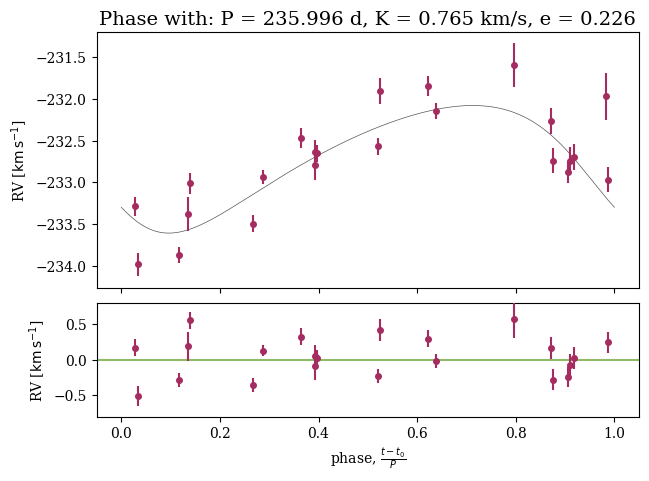

In [93]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 5), gridspec_kw={"height_ratios": (1.8, 0.8), 'hspace': 0.08})

ax[0].set_title(f"Phase with: P = {round(float(Filtrado.median_period()['P'].value),3)} d, K = {round(float(Filtrado.median_period()['K'].value),3)} km/s, e = {round(float(Filtrado.median_period()['e'].value),3)}",fontsize = 14)

    
_ = tj.plot_phase_fold(Filtrado.median_period(), data=data,ax=ax[0],remove_trend = False, data_plot_kwargs=dict(color="#A52C60"))
_ = tj.plot_phase_fold(Filtrado.median_period(), data, ax=ax[1], residual=True, data_plot_kwargs=dict(color="#A52C60"))

ax[1].axhline(0, zorder=-10, color="#73a942", alpha=0.8)
ax[1].set_ylim(-0.8, 0.8)

for ax in fig.get_axes():
    ax.label_outer()
    #ax.grid(linestyle='-', linewidth=0.1)

In [94]:
# En nuestro caso
def Calculo_Masa(P,K,e):
    P = float(P.value)*u.day
    e = float(e.value)
    K = float(K.to("m/s").value)*u.m/u.s
    
    print("P =",P)
    print("e =",e)
    print("K =",K)
    
    def f(P,e,K):
        G = 6.67430e-11*(u.m)**3*1/u.kg * 1/u.s**2
        f = (P*K**3*(1-e**2)**(3/2))/(2*np.pi*G)
        f = f.cgs
        f = (f/(1.989e+33*u.g)*u.M_sun)
        return f
    
    # Función de masa
    f_value = f(P,e,K)
    
    
    M1 = 0.8*u.M_sun
    sini =  1
    
    # Ejemplo de uso
    def resolver_ecuacion_cubica(a, b, c, d):
        coeficientes = [a, b, c, d]
        raices = np.roots(coeficientes)
        return raices
        
    a = (sini)**3
    b = -f_value.value
    c = -2*M1.value*f_value.value
    d = -M1.value**2*f_value.value
    
    raices = resolver_ecuacion_cubica(a, b, c, d)
    print("Las raíces de la ecuación son:", raices)
    
    M2 = raices[0].real*u.M_sun
    M_jupiter = 1.898e27*u.kg
    print("La masa del objeto en M_Sun, M2 = ",M2)
    print("La masa del objeto en kg, M2 = ",M2.to("kg"))
    print("La masa del objeto en M_J, M2 = ",M2.to("M_jup"))
    print("La masa del objeto en M_E, M2 = ",M2.to("M_earth"))
    return M2

In [95]:
M2 = Calculo_Masa(Filtrado.median_period()["P"],Filtrado.median_period()["K"],Filtrado.median_period()["e"])

P = 235.99588326846413 d
e = 0.22644336395017162
K = 765.127492763298 m / s
Las raíces de la ecuación son: [ 0.01893222+0.j        -0.00946105+0.0158914j -0.00946105-0.0158914j]
La masa del objeto en M_Sun, M2 =  0.018932218916475275 solMass
La masa del objeto en kg, M2 =  3.7645010967735796e+28 kg
La masa del objeto en M_J, M2 =  19.832739652902244 jupiterMass
La masa del objeto en M_E, M2 =  6303.408042288945 earthMass


In [96]:
def f(P,e,K):
        G = 6.67430e-11*(u.m)**3*1/u.kg * 1/u.s**2
        f = (P*K**3*(1-e**2)**(3/2))/(2*np.pi*G)
        f = f.cgs
        f = (f/(1.989e+33*u.g)*u.M_sun)
        return f
M1 = 0.8*u.M_sun
sini =  1

In [97]:
def resolver_ecuacion_cubica(a, b, c, d):
        coeficientes = [a, b, c, d]
        raices = np.roots(coeficientes)
        return raices

In [98]:
P_all = Filtrado["P"]
e_all = Filtrado["e"]
K_all = Filtrado["K"].to(u.m/u.s)

# Función de masa
f_value_all = f(P_all,e_all,K_all)
f_value_all

<Quantity [1.05555916e-05, 1.01544924e-05, 1.01630242e-05, 1.08318270e-05,
           1.10876278e-05, 1.09575770e-05, 1.15097791e-05, 1.08481293e-05,
           1.18783301e-05, 1.02154624e-05, 1.16459413e-05, 1.13032963e-05,
           1.10874196e-05, 1.08124899e-05, 1.02076273e-05, 1.03050142e-05,
           9.81200800e-06, 1.02518133e-05, 1.18772954e-05, 1.15440235e-05,
           1.08053702e-05, 9.91288529e-06, 1.01183253e-05, 1.07977870e-05,
           1.09140707e-05, 1.07574869e-05, 1.06174879e-05, 1.15526137e-05,
           1.15536527e-05, 1.13031619e-05, 1.09645944e-05, 1.12235408e-05,
           1.11030081e-05, 1.08920644e-05, 1.08243544e-05, 1.07988795e-05,
           1.21672423e-05, 1.01455832e-05, 1.11702229e-05, 1.20977525e-05,
           1.06729815e-05, 1.04716313e-05, 1.00203488e-05, 9.20355282e-06,
           1.04027410e-05, 1.02538160e-05, 9.93765203e-06, 1.14042499e-05,
           1.19971765e-05, 1.05342104e-05, 1.12660677e-05, 1.12662462e-05,
           1.05865391e-05

In [99]:
a_all = [(sini)**3]*len(f_value_all.value)
b_all = -f_value_all.value
c_all = -2*M1.value*f_value_all.value
d_all = -M1.value**2*f_value_all.value

raices_all = []
M2_all = []
for i in np.arange(len(f_value_all)):
    raices_all = (resolver_ecuacion_cubica(a_all[i], b_all[i], c_all[i], d_all[i]))
    M2_all.append(((raices_all[0].real*u.M_sun).value))

In [100]:

P_all_full = samples["P"]
e_all_full = samples["e"]
K_all_full = samples["K"].to(u.m/u.s)

# Función de masa
f_value_all_full = f(P_all_full,e_all_full,K_all_full)
f_value_all_full

<Quantity [1.16662273e-05, 9.74252326e-06, 9.48857805e-06, ...,
           1.16550223e-05, 1.26459565e-05, 1.00125694e-05] solMass>

In [101]:
a_all_full = [(sini)**3]*len(f_value_all_full.value)
b_all_full = -f_value_all_full.value
c_all_full = -2*M1.value*f_value_all_full.value
d_all_full = -M1.value**2*f_value_all_full.value

raices_all_full = []
M2_all_full = []
for i in np.arange(len(f_value_all_full)):
    raices_all_full = (resolver_ecuacion_cubica(a_all_full[i], b_all_full[i], c_all_full[i], d_all_full[i]))
    M2_all_full.append(((raices_all_full[0].real*u.M_sun).value))

El pico más alto de la distribución está en: 0.019502869525356917


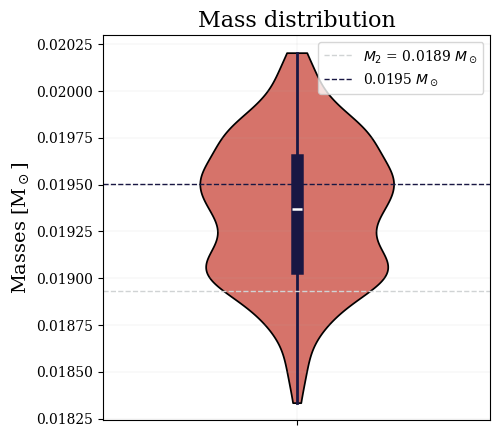

In [102]:
plt.figure(figsize=(5,5))
plt.title("Mass distribution", fontsize = 16)


sns.violinplot(y = abs(np.array(M2_all)),inner_kws=dict(box_width=9, whis_width=2, color="#191743"),
               color = "#e3685c",saturation=0.8, fill=True, inner='box', split=False, width=0.5,
               dodge='auto', gap=0,density_norm='area',common_norm=False, bw_adjust=0.85,
              linecolor='k', cut=0, gridsize=250, native_scale=False)

# Calcula la densidad de la distribución
density = gaussian_kde(M2_all)

# Encuentra el rango de valores en el eje y
y_values = np.linspace(min(M2_all), max(M2_all), 1000)

# Evalúa la densidad en el rango de valores en el eje y
density_values = density(y_values)

# Encuentra el índice del máximo valor de densidad
peak_index = np.argmax(density_values)

# Encuentra el valor en el eje y correspondiente al pico
peak_value = y_values[peak_index]

print("El pico más alto de la distribución está en:", peak_value)

plt.axhline(y=M2.value, color='#D0D3D4', linestyle='--',linewidth = 1, label = f'$M_2$ = { round(float(M2.value),4)} $M_\odot$')
plt.axhline(y=peak_value, color='#191743', linestyle='--',linewidth = 1, label = f'{ round(peak_value,4)} $M_\odot$')

plt.ylabel("Masses [M$_\odot$]", fontsize = 14)
plt.legend()
plt.grid(linestyle='-', linewidth=0.1)
plt.show()

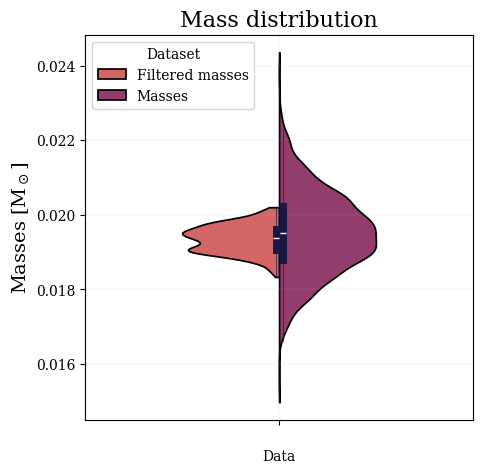

In [103]:
# Crear un DataFrame con las dos listas de datos
plt.figure(figsize=(5,5))
plt.title("Mass distribution", fontsize = 16)

data = pd.DataFrame({
    'Value': M2_all + M2_all_full,
    'Dataset': ['Filtered masses'] * len(M2_all) + ['Masses'] * len(M2_all_full),
    'Data': ['  '] * len(M2_all) + ['  '] * len(M2_all_full)
})

# Crear el diagrama de violín con split=True usando la columna 'Category' para dividir los lados
sns.violinplot(x='Data', y='Value', hue='Dataset', data=data,inner_kws=dict(box_width=5, whis_width=0.5, color="#191743"),
               saturation=0.85, fill=True, inner='box', split=True, width=0.5,
               dodge='auto', gap=0,density_norm='area',common_norm=False, bw_adjust=0.85,
              linecolor='k', cut=0, gridsize=250, native_scale=False, palette = "flare")

# Ajustar el gráfico para que se vea mejor
plt.legend(loc='upper left',title='Dataset')
plt.ylabel("Masses [M$_\odot$]", fontsize = 14)
#plt.ylim(5,40)
plt.grid(linestyle='-', linewidth=0.1)
# Mostrar el gráfico
plt.show()

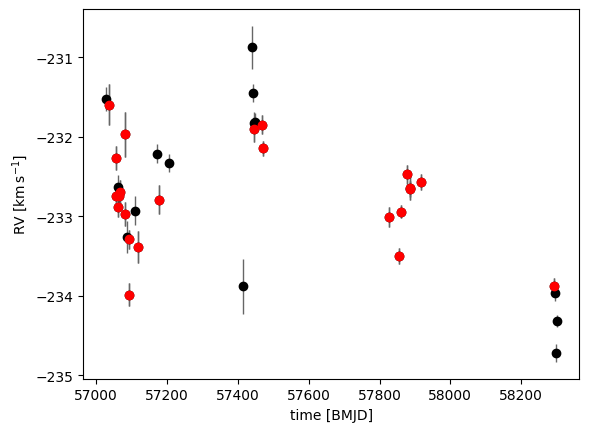

In [67]:
t_0 = df_ordenado_0["MJD"]
rv_0 = np.array(df_ordenado_0["VHELIO"]) * u.km/u.s
err_0 = np.array(df_ordenado_0["VRELERR"]) * u.km/u.s
data_0 = tj.RVData(t=t_0, rv=rv_0, rv_err=err_0)


_ = data_0.plot()
_ = data.plot(color = "red")

In [68]:
prior = JokerPrior.default(P_min=147*u.day, P_max=150*u.day,sigma_K0=30 * u.km / u.s,sigma_v=100 * u.km / u.s)
joker = TheJoker(prior)
print("Listo")

Listo


In [69]:
samples_1 = joker.rejection_sample(data_0, "prior_datosDanilo.hdf5", max_posterior_samples=1000)
samples_1 = samples_1.wrap_K()
samples_1.write("samples_datosDanilo_all.hdf5", overwrite=True)

In [70]:
samples_1 = tj.JokerSamples.read("samples_datosDanilo_all.hdf5")
samples_1

<JokerSamples [P, e, omega, M0, s, K, v0] (4 samples)>

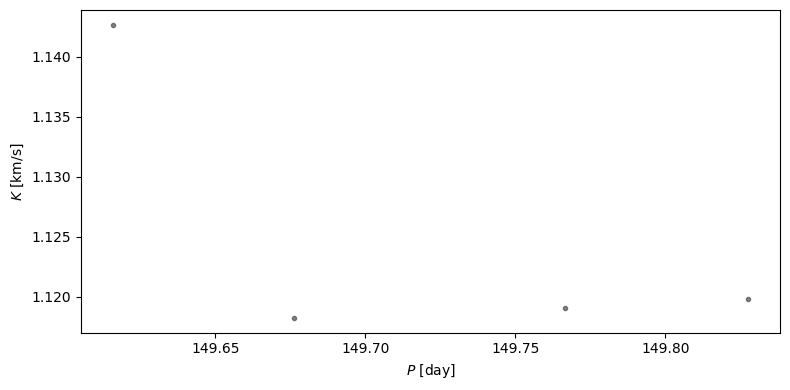

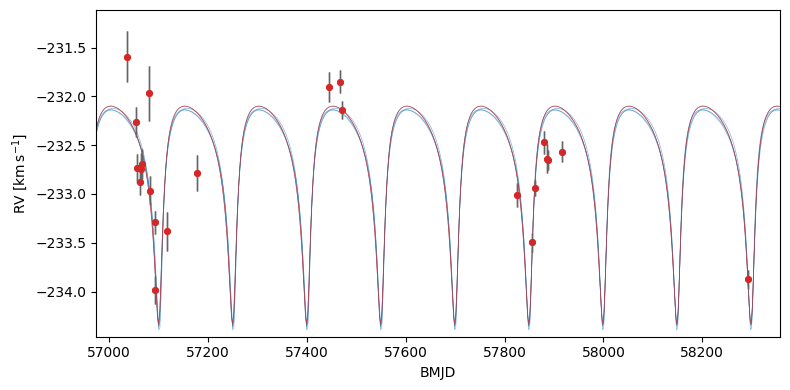

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), layout="tight")
ax.scatter(samples_1['P'].value, samples_1['K'].to(u.km/u.s).value,marker='.', color='k', alpha=0.45)
#ax.set_ylim(0,20)
#plt.vlines(30.38,0,100)
ax.set_xlabel("$P$ [day]")
ax.set_ylabel("$K$ [km/s]")
fig, ax = plt.subplots(1, 1, figsize=(8, 4), layout="tight")


_ = tj.plot_rv_curves(samples_1,data=data,plot_kwargs=dict(color="tab:blue"),data_plot_kwargs=dict(color="tab:red"),relative_to_t_ref=False,ax=ax)
_ = tj.plot_rv_curves(samples_1.median_period(),data=data,plot_kwargs=dict(color="tab:red"),data_plot_kwargs=dict(color="tab:red"),relative_to_t_ref=False,ax=ax)
